# Ejemplo: Mars Express

* Este ejemplo demuestra cómo podemos analizar las posiciones, desplazamientos, velocidades y aceleraciones medias a partir de datos reales de posición, suministrados por la Agencia Espacial Europea ([ESA](https://www.esa.int/)).
    
* La sonda [Mars Express](https://es.wikipedia.org/wiki/Mars_Express) fue lanzada el 2 de Junio del 2003 y llegó a Marte en Diciembre de ese año. 
Queremos usar los datos suministrados por ESA para ilustrar el movimiento del Mars Express, analizar la 
velocidad y aceleración del módulo.

* Algunas posiciones (en coordenadas cartesianas) del Mars Express en su viaje desde la Tierra hasta Marte están listados en el archivo `marsexpress.txt` (los datos han sido reducidos para que sean estríctamente bidimensionales). 

![2022-04-01_12-35.png](./2022-04-01_12-35.png)

Cada posición es de la forma
$$
\vec{r}(t)=x(t)\hat{i} + y(t)\hat{j} + z(t)\hat{k}.
$$
Por ejemplo
$$
\vec{r}(t_0) = x_0\hat{i} + y_0\hat{j} + z_0\hat{k}, \\
\vec{r}(t_1) = x_1\hat{i} + y_1\hat{j} + z_1\hat{k}, \\
\vdots \\
\vec{r}(t_{N-1}) = x_{N-1}\hat{i} + y_{N-1}\hat{j} + z_{N-1}\hat{k}. \\
$$

Primero cargaremos las posiciones a arreglos de Numpy:

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [26]:
data = np.genfromtxt('marsexpress.txt')
t = data[:,0] # días
x_km = data[:,1] # km
y_km = data[:,2] # km
z_km = data[:,3] # km

Ahora podemos hacer un gráfico rápido de las posiciones

(-39111438.3, 204588112.3, -163273171.0, 145814311.0)

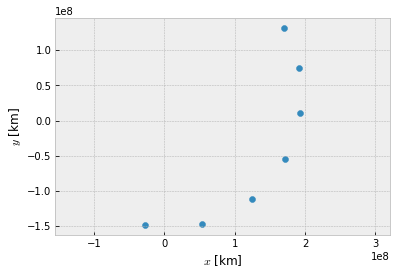

In [27]:
plt.scatter(x_km,y_km)
plt.xlabel('$x$ [km]')
plt.ylabel('$y$ [km]')
plt.axis('equal')

* Podemos convertir las unidades desde kilómetros a [Unidades Astronómicas](https://es.wikipedia.org/wiki/Unidad_astron%C3%B3mica) (la distancia media desde el Sol 
a la Tierra): 
$$
1\ UA = 149 597 870. 7 \ km
$$

In [28]:
UA = 149597870.7 # km
x = x_km/UA # UA
y = y_km/UA # UA

In [29]:
r_marte = 1.523679 # UA, https://es.wikipedia.org/wiki/Marte_(planeta)

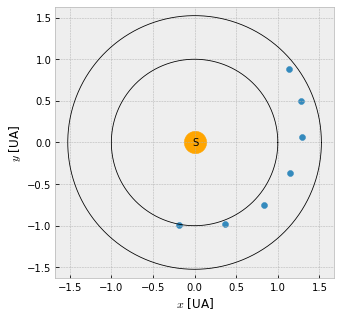

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
# elementos de decorado adicionales
plt.xlabel('$x$ [UA]')
plt.ylabel('$y$ [UA]')
plt.axis('equal')
plt.scatter(0,0,s=500, color='orange') # círculo que representa el Sol
plt.text(-0.03,-0.03,'S') # Texto 'S' para el Sol
# el resto grafica 2 círculos, uno para la Tierra y otro para Marte (se aproxima que sus órbitas son circulares)
theta = np.linspace(0, 2*np.pi, 1000)
plt.plot(np.cos(theta),np.sin(theta), color='black', linewidth=0.8)
plt.plot(r_marte*np.cos(theta),r_marte*np.sin(theta), color='black', linewidth=0.8)

# Desplazamientos

El vector desplazamiento entre dos tiempos $t_i$ y $t_{i+1}$ es dado por
\begin{align}
(\Delta r)_i &= \vec{r}(t_{i+1})-\vec{r}(t_i) \\
& = \left(x(t_{i+1})-x(t_i)\right)\hat{i} + \left(y(t_{i+1})-y(t_i)\right)\hat{j} + \left(z(t_{i+1})-z(t_i)\right)\hat{k} \\
& = (\Delta x)_i\hat{i} + (\Delta y)_i\hat{j} + (\Delta z)_i\hat{k}
\end{align}

Hay varias forma de calcular los desplazamientos a partir de los arreglos de posiciones. Una forma es usando un ciclo `for` por ejemplo para la componente $x$:

In [31]:
N = len(t)
Dx = np.zeros(N)
for i in range(N-1):
    Dx[i] = x[i+1]-x[i]
print(Dx)

[ 0.54945727  0.47035635  0.31655471  0.14456884 -0.01315239 -0.14433828
  0.        ]


In [32]:
x

array([-0.18739696,  0.36206031,  0.83241666,  1.14897137,  1.2935402 ,
        1.28038781,  1.13604953])

Sin embargo, existe la función `np.diff` que realiza directamente la misma operación:

In [33]:
np.diff(x)

array([ 0.54945727,  0.47035635,  0.31655471,  0.14456884, -0.01315239,
       -0.14433828])

In [38]:
data

array([[ 4.9532291e-02, -2.8034186e+07, -1.4922374e+08, -3.5527680e+04],
       [ 3.0066101e+01,  5.4163451e+07, -1.4711959e+08, -2.6206946e+05],
       [ 6.0082670e+01,  1.2452776e+08, -1.1167004e+08, -4.2939533e+05],
       [ 9.0099239e+01,  1.7188367e+08, -5.4904690e+07, -5.1677779e+05],
       [ 1.2011581e+02,  1.9351086e+08,  1.0496006e+07, -5.2653357e+05],
       [ 1.5013238e+02,  1.9154329e+08,  7.4880556e+07, -4.7213981e+05],
       [ 1.8014894e+02,  1.6995059e+08,  1.3176488e+08, -3.7005167e+05]])

In [39]:
np.diff(data, axis=0)/UA

array([[ 2.00648369e-07,  5.49457266e-01,  1.40653740e-02,
        -1.51433827e-03],
       [ 2.00648371e-07,  4.70356354e-01,  2.36965605e-01,
        -1.11850436e-03],
       [ 2.00648371e-07,  3.16554706e-01,  3.79452928e-01,
        -5.84115667e-04],
       [ 2.00648384e-07,  1.44568836e-01,  4.37176650e-01,
        -6.52133614e-05],
       [ 2.00648377e-07, -1.31523931e-02,  4.30384134e-01,
         3.63599828e-04],
       [ 2.00648310e-07, -1.44338284e-01,  3.80248220e-01,
         6.82417066e-04]])

Usando esta funciones, calculamos las 3 componentes de los desplazamientos:

In [37]:
Dx = np.diff(x) # UA
Dy = np.diff(y) #UA
Dz = np.diff(z) #UA
Dt = np.diff(t) # días

NameError: name 'z' is not defined

In [ ]:
for i in range(len(Dx)):
    print('Desplazamiento ',i,' = (',Dx[i],',',Dy[i],',',Dz[i],')')

Estos desplazamientos pueden ser graficados usando la función `quiver` de Matplotlib

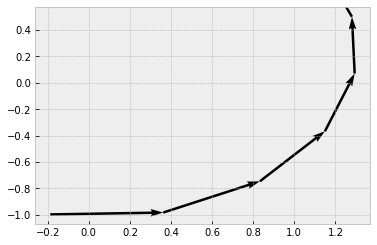

In [35]:
plt.quiver(x[:-1],y[:-1],Dx,Dy,angles='xy',scale_units='xy',scale=1)

Integrando todos los elementos en el gráfico, tenemos:

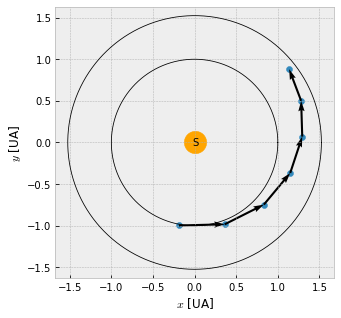

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.quiver(x[:-1],y[:-1],Dx,Dy,angles='xy',scale_units='xy',scale=1)
# elementos de decorado adicionales
plt.xlabel('$x$ [UA]')
plt.ylabel('$y$ [UA]')
plt.axis('equal')
plt.scatter(0,0,s=500, color='orange') # círculo que representa el Sol
plt.text(-0.03,-0.03,'S') # Texto 'S' para el Sol
# el resto grafica 2 círculos, uno para la Tierra y otro para Marte (se aproxima que sus órbitas son circulares)
theta = np.linspace(0, 2*np.pi, 1000)
plt.plot(np.cos(theta),np.sin(theta), color='black', linewidth=0.8)
plt.plot(r_marte*np.cos(theta),r_marte*np.sin(theta), color='black', linewidth=0.8)

Calculamos ahora la norma de cada desplazamiento:

In [ ]:
Dr = np.sqrt(Dx**2+Dy**2+Dz**2)
print(Dr)

In [ ]:
for i in range(len(Dx)):
    print('Norma de desplazamiento ',i,' = ',Dr[i],' UA')

In [43]:
Dy

array([0.01406537, 0.23696561, 0.37945293, 0.43717665, 0.43038413,
       0.38024822])

Calculamos finalmente el ángulo de cada desplazamiento c/r al eje $x$

In [44]:
theta = np.arctan2(Dy,Dx)
print(theta)

[0.02559308 0.46668311 0.87552337 1.25142895 1.60134648 1.93358471]


In [45]:
for i in range(len(Dx)):
    print('Ángulo c/r a horizontal de desplazamiento ',i,' = ',theta[i],' rad')

Ángulo c/r a horizontal de desplazamiento  0  =  0.025593078422465013  rad
Ángulo c/r a horizontal de desplazamiento  1  =  0.4666831120004055  rad
Ángulo c/r a horizontal de desplazamiento  2  =  0.8755233690450177  rad
Ángulo c/r a horizontal de desplazamiento  3  =  1.251428946147766  rad
Ángulo c/r a horizontal de desplazamiento  4  =  1.6013464796362018  rad
Ángulo c/r a horizontal de desplazamiento  5  =  1.933584705916321  rad


In [46]:
for i in range(len(Dx)):
    print('Ángulo c/r a horizontal de desplazamiento ',i,' = ',theta[i]*180/np.pi,' grados')

Ángulo c/r a horizontal de desplazamiento  0  =  1.46637537835458  grados
Ángulo c/r a horizontal de desplazamiento  1  =  26.738972687654336  grados
Ángulo c/r a horizontal de desplazamiento  2  =  50.16379391135434  grados
Ángulo c/r a horizontal de desplazamiento  3  =  71.70159697477136  grados
Ángulo c/r a horizontal de desplazamiento  4  =  91.75039482128638  grados
Ángulo c/r a horizontal de desplazamiento  5  =  110.78624298004965  grados
